In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Find total number of rows and columns

In [3]:
data.shape

(10000, 14)

In [4]:
print("total numbers of rows are",data.shape[0])
print("total number of columns are", data.shape[1])

total numbers of rows are 10000
total number of columns are 14


### Get information about our dataset'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Check the Null values in the dataset

In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Get overall statistics about Dataset 

In [7]:
data.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


### Dropping irrelevant Features

In [8]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [9]:
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Encoding of categorical data - we have to covert string into numerical values

In [11]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [19]:
data = pd.get_dummies(data, drop_first=True).astype(int) # get_dummies is a method used to convert the values into binary

In [31]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [32]:
data['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [33]:
import seaborn as sns

<Axes: xlabel='Exited', ylabel='count'>

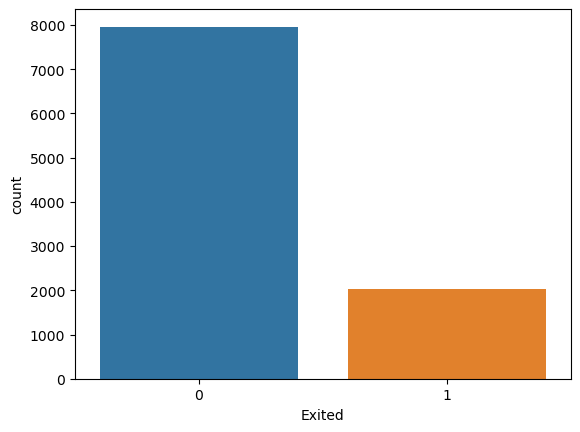

In [34]:
sns.countplot(x='Exited', data=data)


#### Above contains imbalance of data as 0  and 1 are differ

####  seperate Independent and Dependent variabels in X & Y

In [37]:
x = data.drop('Exited', axis=1)
y=  data['Exited']

In [42]:
x.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,0,0,0
1,608,41,1,83807,1,0,1,112542,0,1,0
2,502,42,8,159660,3,1,0,113931,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0
4,850,43,2,125510,1,1,1,79084,0,1,0


In [43]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int32

#### Handling imbalanced data with SMOTE using oversampling and undersampling

In [71]:
#SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance in datasets, specifically by oversampling the minority class. The goal of SMOTE is to generate synthetic data points for the minority class, rather than simply duplicating existing ones, which helps in creating a more balanced dataset.

In [72]:
from imblearn.over_sampling import SMOTE

In [74]:
x_res, y_res = SMOTE().fit_resample(x, y)


In [75]:
y_res.value_counts()

Exited
1    7963
0    7963
Name: count, dtype: int64

#### Splitting the dataset into training set and testing set

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.20, random_state=42)  # here we have use test_size=0.20 to get 20% test data, random_state will give
#  results according to number assign, we have use a stratify just because we have imbalanced data but after using SMOTE now we have balanced data and we
# have removed it

#### Feature Scaling

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()   # we have to use a StandardScaler to fit the data in standard scale beacuse there is size difference in the columns

In [83]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [84]:
x_train

array([[-2.06858627,  0.00268157,  0.80829781, ..., -0.57940469,
        -0.46188022,  1.17908605],
       [ 1.09432083,  0.10316166, -1.39607211, ..., -0.57940469,
        -0.46188022,  1.17908605],
       [ 1.5196773 ,  1.10796252, -1.02867712, ..., -0.57940469,
        -0.46188022,  1.17908605],
       ...,
       [ 0.19998158,  0.20364175,  1.17569279, ..., -0.57940469,
        -0.46188022,  1.17908605],
       [-2.36306383, -1.00211929,  0.07350783, ..., -0.57940469,
        -0.46188022, -0.84811452],
       [ 0.52717886,  1.00748244, -1.39607211, ...,  1.7259094 ,
        -0.46188022,  1.17908605]])

#### Logistic Regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
log = LogisticRegression()

In [87]:
log.fit(x_train, y_train)

LogisticRegression()

In [88]:
y_pred1 = log.predict(x_test)

In [89]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(y_test, y_pred1)

0.809

In [90]:
accuracy_score(y_test, y_pred1)

0.7827997489014438

In [92]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [65]:
precision_score(y_test, y_pred1)   # before using a smote  imabalanced data with less score

0.5939849624060151

In [93]:
precision_score(y_test, y_pred1)    # after using smote balanced data with better score

0.7685589519650655

In [67]:
recall_score(y_test, y_pred1)       # before using a smote  imabalanced data with less score

0.1941031941031941

In [94]:
recall_score(y_test, y_pred1)       # after using smote balanced data with better score

0.7933032839665164

In [69]:
f1_score(y_test, y_pred1)           # before using a smote  imabalanced data with less score

0.29259259259259257

In [95]:
f1_score(y_test, y_pred1)           # after using smote balanced data with better score

0.7807351077313055

#### SUPPORT VECTOR CLASSIFIER

In [96]:
from sklearn import svm

In [97]:
svm = svm.SVC()

In [98]:
svm.fit(x_train, y_train)

SVC()

In [99]:
y_pred2 = svm.predict(x_test)

In [100]:
accuracy_score(y_test, y_pred2)

0.8333333333333334

In [101]:
precision_score(y_test, y_pred2)

0.8275641025641025

#### KNeighbors Classifier

In [104]:
from sklearn.neighbors import KNeighborsClassifier

In [105]:
knn = KNeighborsClassifier()

In [106]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [107]:
y_pred3 = knn.predict(x_test)

In [108]:
accuracy_score(y_test, y_pred3)

0.8195229127432517

In [109]:
precision_score(y_test, y_pred3)

0.8014796547472256

#### Decision Tree Classifier

In [110]:
from sklearn.tree import DecisionTreeClassifier

In [111]:
dt = DecisionTreeClassifier()

In [112]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [113]:
y_pred4 = dt.predict(x_test)

In [114]:
accuracy_score(y_test, y_pred4)

0.7912743251726303

In [115]:
precision_score(y_test, y_pred4)

0.7754342431761787

#### Random Forest Classifier

In [117]:
from sklearn.ensemble import RandomForestClassifier

In [118]:
rf = RandomForestClassifier()

In [119]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [120]:
y_pred5 = rf.predict(x_test)

In [121]:
accuracy_score(y_test, y_pred5)

0.8628374136848713

In [122]:
precision_score(y_test, y_pred5)

0.8527180783817951

#### Gradient Boosting CLassifier

In [123]:
from sklearn.ensemble import GradientBoostingClassifier

In [124]:
gbc = GradientBoostingClassifier()

In [125]:
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [126]:
y_pred6 = gbc.predict(x_test)

In [128]:
precision_score(y_test, y_pred6)

0.8376455368693402

In [130]:
accuracy_score(y_test, y_pred6)

0.8402385436283741

In [132]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'ACC':[accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2)
                                                                ,accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4)
                                                                ,accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})

In [134]:
final_data

,Models,ACC
0,LR,0.782800
1,SVC,0.833333
2,KNN,0.819523
3,DT,0.791274
4,RF,0.862837
5,GBC,0.840239


In [135]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

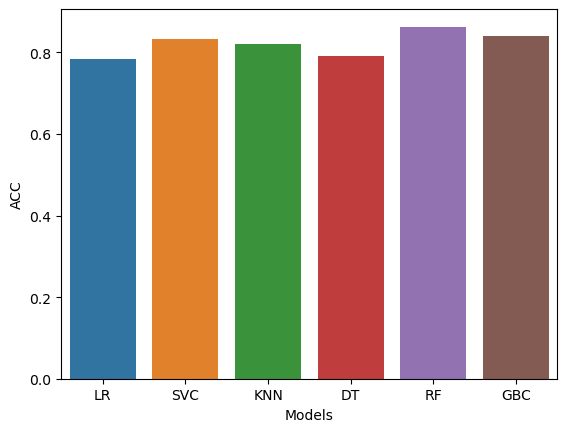

In [138]:
sns.barplot(x='Models', y='ACC', data=final_data)


In [139]:
# As per above plotting Random Forst has highest accuracy and random forest is a best model 

In [143]:
final_data2 = pd.DataFrame({'Models':['LR','SVC','KNN','DT','RF','GBC'],'PRE':[precision_score(y_test,y_pred1),precision_score(y_test,y_pred2)
                                                                ,precision_score(y_test,y_pred3),precision_score(y_test,y_pred4)
                                                                ,precision_score(y_test,y_pred5),precision_score(y_test,y_pred6)]})

In [144]:
final_data2

,Models,PRE
0,LR,0.768559
1,SVC,0.827564
2,KNN,0.801480
3,DT,0.775434
4,RF,0.852718
5,GBC,0.837646


<Axes: xlabel='Models', ylabel='PRE'>

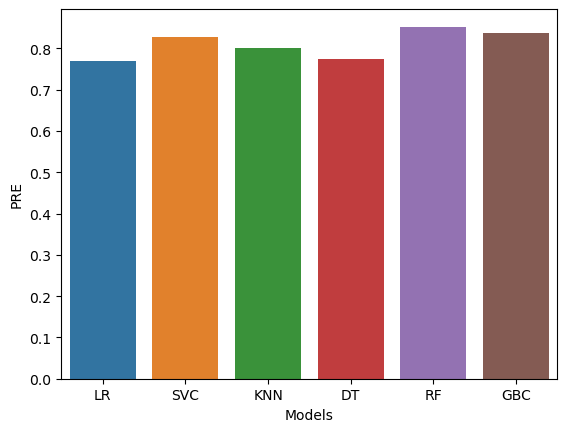

In [145]:
sns.barplot(x='Models', y='PRE', data=final_data2)

In [146]:
# As per above plotting Random Forst has highest accuracy and random forest is a best model 

### SAVE THE MODEL

In [149]:
x_res = sc.fit_transform(x_res)

In [150]:
rf.fit(x_res, y_res)

RandomForestClassifier()

In [151]:
 # now random forest is trained on entire dataset

In [152]:
import joblib

In [153]:
joblib.dump(rf,'churn_predict_model')

['churn_predict_model']

In [155]:
Model = joblib.load('churn_predict_model')

In [156]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [158]:
Model.predict([[619,42,2,0.0,0,0,0,101348.88,0,0,0]]) # by using this we can predict our model by passing a values for above columns

array([1])

### The array([1]) shows that the customer will leave the bank 